In [16]:
import pandas as pd
import plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import timeit
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='once')

### Helper functions

In [17]:
##model fit and cross validation function

def modelfit(estimator,data_train,data_test,predictors,target):
    start = timeit.default_timer()
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    start1 = timeit.default_timer()
    train_pred=estimator.predict(data_train[predictors])
    stop1 = timeit.default_timer()
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=5,scoring='precision')

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on Train Data: %.4g" % metrics.accuracy_score(data_train.loc[:,target].values, train_pred))
    print ("Precision on Train Data: %.4g" % metrics.precision_score(data_train.loc[:,target].values, train_pred))
    print ("Recall on Train Data: %.4g" % metrics.recall_score(data_train.loc[:,target].values, train_pred))
    print ("F1 score on Train Data: %.4g" % metrics.f1_score(data_train.loc[:,target].values, train_pred))
    
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    start2 = timeit.default_timer()
    test_pred=estimator.predict(data_test[predictors])
    stop2 = timeit.default_timer()
    print ("Accuracy on Test Data: %.4g" % metrics.accuracy_score(data_test.loc[:,target].values, test_pred))  
    print ("Precision on Test Data: %.4g" % metrics.precision_score(data_test.loc[:,target].values, test_pred)) 
    print ("Recall on Test Data: %.4g" % metrics.recall_score(data_test.loc[:,target].values, test_pred)) 
    print ("F1 score on Test Data: %.4g" % metrics.f1_score(data_test.loc[:,target].values, test_pred)) 
    stop = timeit.default_timer()
    print('Total Time: ', stop - start)
    print('training time: ', stop1 - start1)
    print('testing time: ', stop2 - start2)
    return test_pred

In [18]:
## create learning curve ploting function

from sklearn.model_selection import learning_curve
##learning curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
def plot_learning_curve(alg, X, y, scoring_metric, algorithm_name):
    sizes, training_scores, testing_scores = learning_curve(alg, X, y, cv=5, scoring= scoring_metric, train_sizes=np.linspace(0.01, 1.0, 30))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)

    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)

    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    # Drawing plot
    plt.title("LEARNING CURVE FOR %s" % algorithm_name)
    plt.xlabel("Training Set Size"), plt.ylabel("%s Score" % scoring_metric), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return

In [19]:
# create validation curve ploting function


 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
def plot_validation_curve(alg,X, y, param_name, parameter_range, scoring_metric, algorithm_name):
    train_score, test_score = validation_curve(alg, X, y,
                                           param_name = param_name,
                                           param_range = parameter_range,
                                            cv = 5, scoring = scoring_metric)

    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with %s" % algorithm_name)
    plt.xlabel("%s" % param_name)
    plt.ylabel("%s" % scoring_metric)
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()
    return

## Loading Data 

In [20]:
df = pd.read_csv('../Data/CC_df_sampled.csv')
X_train, X_final_test = train_test_split(df,test_size=0.2, random_state= 2)
X_final_test.to_csv('../Data/testing_dataset.csv', index = False)
## within the training dataset, split the data into training dataset and testing/validation dataset
X_train, X_validation = train_test_split(X_train,test_size=0.2, random_state= 2)

In [21]:
X_all = df.drop(['approved', 'user_id'], axis = 1)
y_all = df['approved']
X = X_train.drop(['approved', 'user_id'], axis = 1)
y = X_train['approved']
X_val = X_validation.drop(['approved', 'user_id'], axis = 1)
y_val = X_validation['approved']
X_final = X_final_test.drop(['approved', 'user_id'], axis = 1)
y_final = X_final_test['approved']

In [22]:
X_val.head()

,education_num,hours_per_week,married,hours,capital_net,inquiry,institution_BRO,institution_PVT,account_type_high_approval,account_type_mid_approval,...,occupation_ Tech-support,occupation_ Transport-moving,asset_code_1.0,asset_code_2.0,asset_code_4.0,asset_code_19.0,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
7257,6.0,40.0,1,1,0.0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3192,9.0,40.0,0,1,0.0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
6018,10.0,70.0,1,1,0.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1412,10.0,20.0,0,0,0.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
9652,10.0,40.0,0,1,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## RP

In [42]:
from sklearn.random_projection import GaussianRandomProjection
rp = GaussianRandomProjection(n_components=3, random_state=2)
rp_df = pd.DataFrame(rp.fit_transform(X), columns = ['pc1', 'pc2', 'pc3']) 
X_rp=rp.fit_transform(X.values)

In [43]:
rp_df = pd.DataFrame(rp.fit_transform(X_all), columns = ['pc1', 'pc2', 'pc3'])

rp_df.head()

,pc1,pc2,pc3
0,-4.689724,10.998367,23.592573
1,-7.226569,3.161328,21.464754
2,-8.054891,-5.310530,14.662682
3,-4548.090656,2139.799369,1289.256803
4,-6.191265,-13.388801,4.652293


In [25]:
rp_X= pd.DataFrame(rp.transform(X), columns = ['pc1', 'pc2', 'pc3'])
rp_X['target'] = list(y)
rp_X_validation = pd.DataFrame(rp.transform(X_val), columns = ['pc1', 'pc2', 'pc3'])
rp_X_validation['target'] = list(y_val)
rp_X_final = pd.DataFrame(rp.transform(X_final), columns = ['pc1', 'pc2', 'pc3'])
rp_X_final['target'] = list(y_final)

In [26]:
predictors = ['pc1', 'pc2', 'pc3']
target = 'target'

**Baseline model**

The precision score with PCA is lower than with the original data 0.6078 vs 0.7077 for training 
and for validation the precision is 0.5941 with PCA and 0.7306 with the original data

PCA with 1 PC doesn't capture all of the variance in the data, the variances that are excluded from the transformation are actually not outliers or noise and are predictive of the target variable 

In [27]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1)
y_pred=modelfit(mlp, rp_X, rp_X_validation,predictors,target)


Model Report
Accuracy on Train Data: 0.7759
Precision on Train Data: 0.5846
Recall on Train Data: 0.2953
F1 score on Train Data: 0.3924
CV Score : Mean - 0.635 | Std - 0.09421 | Min - 0.5238 | Max - 0.8056
Accuracy on Test Data: 0.7681
Precision on Test Data: 0.5808
Recall on Test Data: 0.2854
F1 score on Test Data: 0.3827
Total Time:  2.546386908000045
training time:  0.0036506479999616204
testing time:  0.003207459000009294


/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

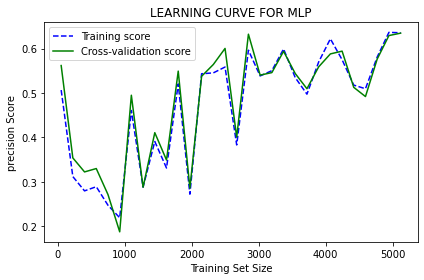

In [28]:
plot_learning_curve(mlp, rp_X[['pc1', 'pc2', 'pc3']], rp_X['target'], 'precision', 'MLP')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1.8488925525237587, 1.130104089262008, 1.0635541035658866, 1.0584984100576353, 1.136467235702254, 1.1751791492733883, 1.076654206398666, 1.0552308158133767, 0.9369852514127969, 0.9572367140228992, 1.147844725420222, 0.953982760641586, 0.9161667179412052, 1.1202754222501887, 1.233686410650915, 0.922640323678719, 0.7257382834811286, 0.8469439158999702, 1.1548581681969377, 1.3148683135310337, 1.357134322010842, 1.0191504491580352, 1.1645807459617652, 1.1087464206056172, 0.9677979592231677, 0.9497914372954824, 1.0014317495102127, 1.1166153217253099]


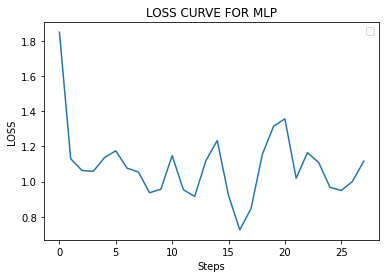

In [29]:
loss_values = mlp.loss_curve_
print (loss_values)
plt.plot(loss_values)
plt.title("LOSS CURVE FOR %s" % 'MLP')
plt.xlabel("Steps"), plt.ylabel('LOSS'), plt.legend(loc="best")
plt.show()

**Hyperparameter tuning**

1. validation curve 
2. grid search 

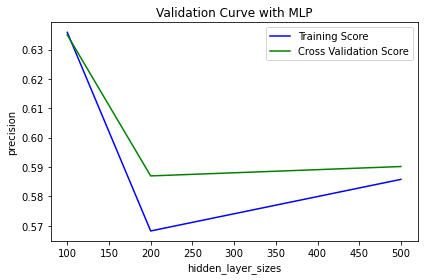

In [30]:
##number of nodes
parameter_range=[(100,),(200,),(500,)]
plot_validation_curve(mlp ,rp_X[['pc1', 'pc2', 'pc3']], rp_X['target'], "hidden_layer_sizes", parameter_range, "precision", 'MLP')

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/Users/ej7793/.local/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7

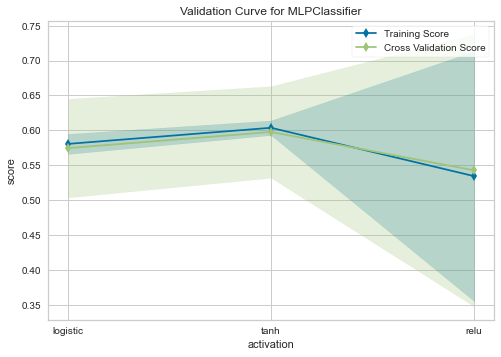

<AxesSubplot:title={'center':'Validation Curve for MLPClassifier'}, xlabel='activation', ylabel='score'>

In [31]:
from yellowbrick.model_selection import ValidationCurve


viz = ValidationCurve(
    mlp, param_name="activation",
    param_range=['logistic', 'tanh', 'relu'], cv=10, scoring="precision"
)
viz.fit(rp_X[['pc1', 'pc2', 'pc3']], rp_X['target'])
viz.show()

In [32]:
param_grid = {
              'hidden_layer_sizes': [(200,100), (500), (100)]}
grid_lr = GridSearchCV(estimator =mlp, param_grid= param_grid, scoring='precision', 
                        refit=True, return_train_score=True) 
grid_lr.fit(rp_X[['pc1', 'pc2', 'pc3']], rp_X['target'])

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [(200, 100), 500, 100]},
             return_train_score=True, scoring='precision')

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


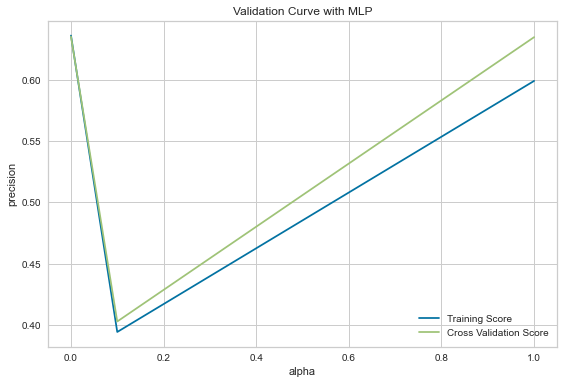

In [33]:
##regularization
## choose alpha = 0.1
parameter_range = [0.0001, 0.1, 1]
plot_validation_curve(mlp ,rp_X[['pc1', 'pc2', 'pc3']], rp_X['target'], "alpha", parameter_range, "precision", 'MLP')


Grid search

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'activation': ['tanh', 'relu'],
              'alpha': [0.0001, 0.1],
              'hidden_layer_sizes': [(100,),(500,)],
               'learning_rate_init': [0.001, 0.01]}
grid_lr = GridSearchCV(estimator =mlp, param_grid= param_grid, scoring='precision', 
                        refit=True, return_train_score=True) 
grid_lr.fit(rp_X[['pc1', 'pc2', 'pc3']], rp_X['target'])

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['tanh', 'relu'], 'alpha': [0.0001, 0.1],
                         'hidden_layer_sizes': [(100,), (500,)],
                         'learning_rate_init': [0.001, 0.01]},
             return_train_score=True, scoring='precision')

In [35]:
mlp_tuned = grid_lr.best_estimator_
print(mlp_tuned.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (500,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [36]:
y_pred=modelfit(mlp_tuned, rp_X, rp_X_validation, predictors,target)


Model Report
Accuracy on Train Data: 0.775
Precision on Train Data: 0.5798
Recall on Train Data: 0.2966
F1 score on Train Data: 0.3924
CV Score : Mean - 0.6458 | Std - 0.1077 | Min - 0.4677 | Max - 0.7895
Accuracy on Test Data: 0.77
Precision on Test Data: 0.5879
Recall on Test Data: 0.2903
F1 score on Test Data: 0.3887
Total Time:  12.346495664000031
training time:  0.03169988399986323
testing time:  0.008837820000053398


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3.2525328189266984, 2.4855407473617332, 2.3858051307789356, 2.230832150591538, 2.0777997498292895, 1.9512417169250915, 1.9077420515933772, 1.817823022907367, 1.3542970800822005, 1.190729448786698, 1.5880325917976665, 1.6618561922744448, 1.3665972461097333, 1.27708577958228, 0.9644046909183258, 0.9290049682049631, 0.7306465901429098, 0.6429092660728611, 0.5529122820712696, 0.5330920395796448, 0.5019702424682521, 0.5146440473144864, 0.49947968688780164, 0.5007756416178804, 0.5318717578170397, 0.5080297296000507, 0.496962721608406, 0.49538305920830183, 0.4976280627279759, 0.5009480427353845, 0.5082957063859305, 0.5615176812969708, 1.089323864637595, 1.4711884699787339, 1.7529378509239932, 1.712032738191066, 1.3438373695997117, 1.425060522502478, 1.2487333590033372]


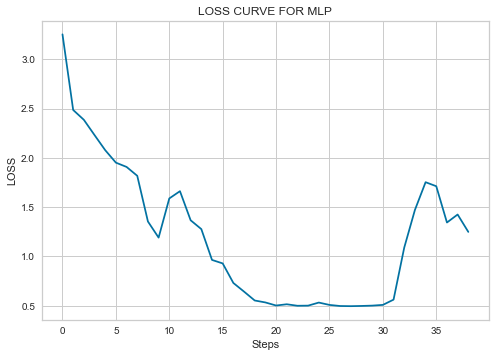

In [37]:
test_acc = metrics.precision_score(y_val, y_pred) * 100.
loss_values = mlp_tuned.loss_curve_
print (loss_values)
plt.plot(loss_values)
plt.title("LOSS CURVE FOR %s" % 'MLP')
plt.xlabel("Steps"), plt.ylabel('LOSS'), plt.legend(loc="best")
plt.show()

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

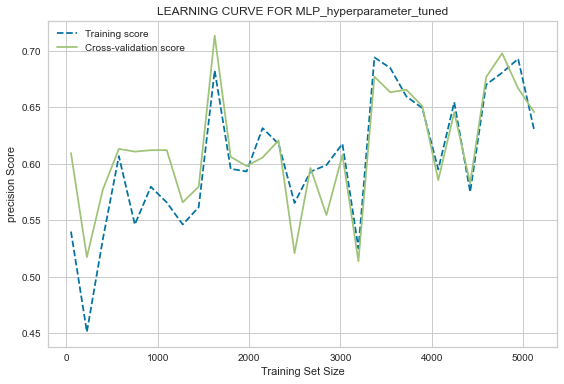

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classi

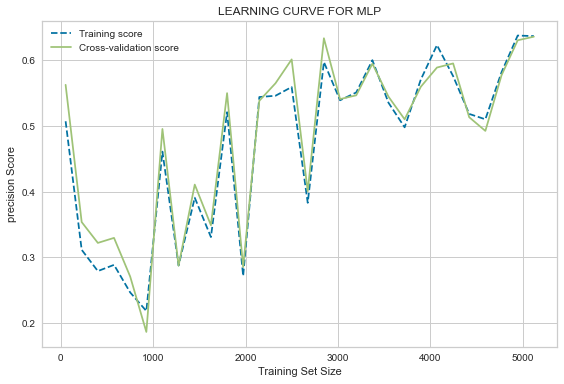

In [38]:
disp = plot_learning_curve(mlp_tuned, rp_X[['pc1', 'pc2', 'pc3']], rp_X['target'], 'precision', 'MLP_hyperparameter_tuned')
plot_learning_curve(mlp, rp_X[['pc1', 'pc2', 'pc3']], rp_X['target'], 'precision', 'MLP');



## Final test dataset prediction evaluation 

In [39]:
y_pred=modelfit(mlp_tuned, rp_X, rp_X_final, predictors,target)


Model Report
Accuracy on Train Data: 0.775
Precision on Train Data: 0.5798
Recall on Train Data: 0.2966
F1 score on Train Data: 0.3924
CV Score : Mean - 0.6458 | Std - 0.1077 | Min - 0.4677 | Max - 0.7895
Accuracy on Test Data: 0.7735
Precision on Test Data: 0.5941
Recall on Test Data: 0.3194
F1 score on Test Data: 0.4155
Total Time:  12.694792207000091
training time:  0.03384382900003402
testing time:  0.01112779999994018
